
# **Abstract**

This dataset comprises detailed demographic and financial information of individuals seeking loans, with a focus on personal attributes and loan characteristics. The data includes 45,000 observations and 14 variables, encompassing personal details such as age, gender, education level, income, employment experience, and homeownership status. Key loan-related attributes include loan amount, loan intent, interest rate, percentage of income dedicated to loan repayment, and credit history length. Additionally, the dataset provides information on loan status and previous loan defaults, offering insights into the likelihood of loan approval or default. The analysis of this data can provide valuable insights into the factors influencing loan application outcomes, the financial stability of applicants, and potential risks for lending institutions. By exploring correlations between demographic traits and loan characteristics, this dataset offers a foundation for predictive modeling and decision-making in personal lending.

#1.Data Analiysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/loan_data.csv")
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


#2.Data Visualisation

<Axes: xlabel='loan_status', ylabel='count'>

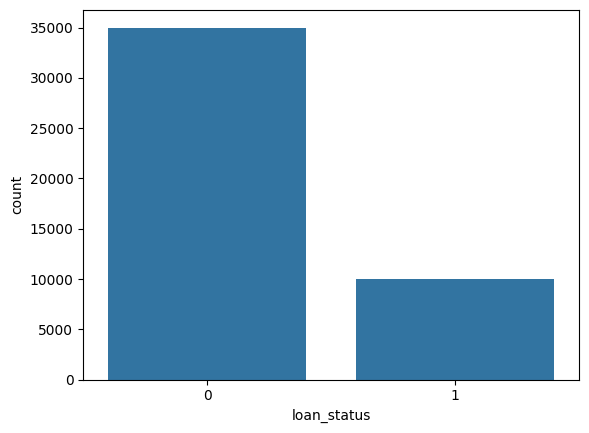

In [ ]:
sns.countplot(x='loan_status',data=df)

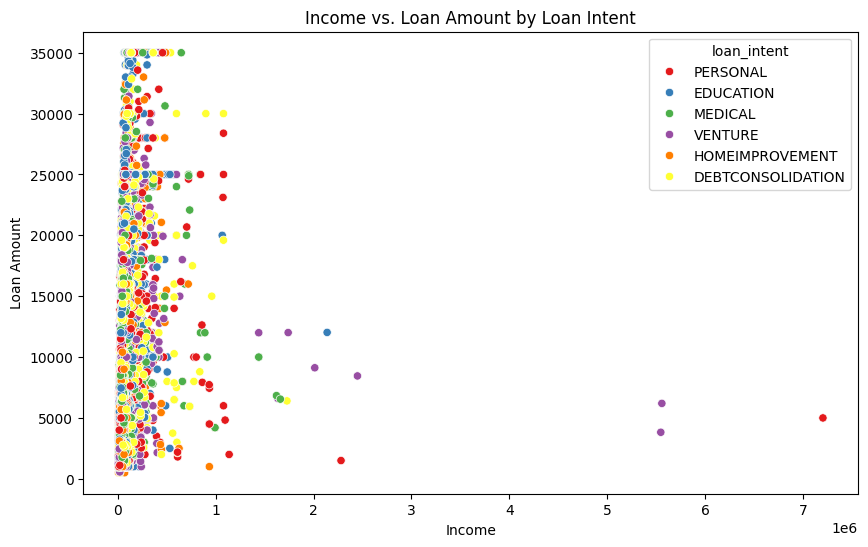

In [ ]:
# This plot visualizes the relationship between person's income and loan amount.
# It also uses the 'loan_intent' column to color-code the points by loan purpose.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='person_income', y='loan_amnt', hue='loan_intent', palette='Set1')
plt.title('Income vs. Loan Amount by Loan Intent')
plt.xlabel('Income')
plt.ylabel('Loan Amount')
plt.show()

<ipython-input-37-d949ef99f8c4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='loan_intent', palette='Set2')


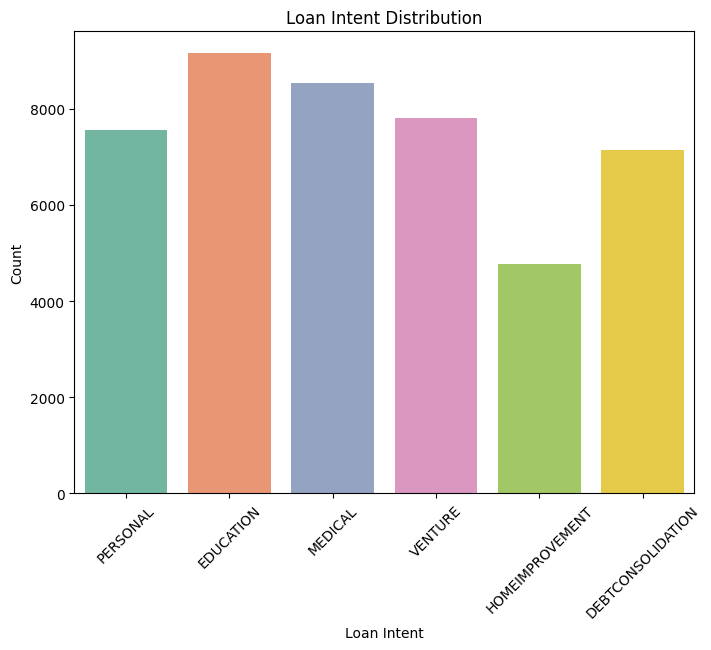

In [ ]:
# This plot shows the distribution of different loan intents (e.g., Personal, Education, etc.).

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='loan_intent', palette='Set2')
plt.title('Loan Intent Distribution')
plt.xlabel('Loan Intent')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


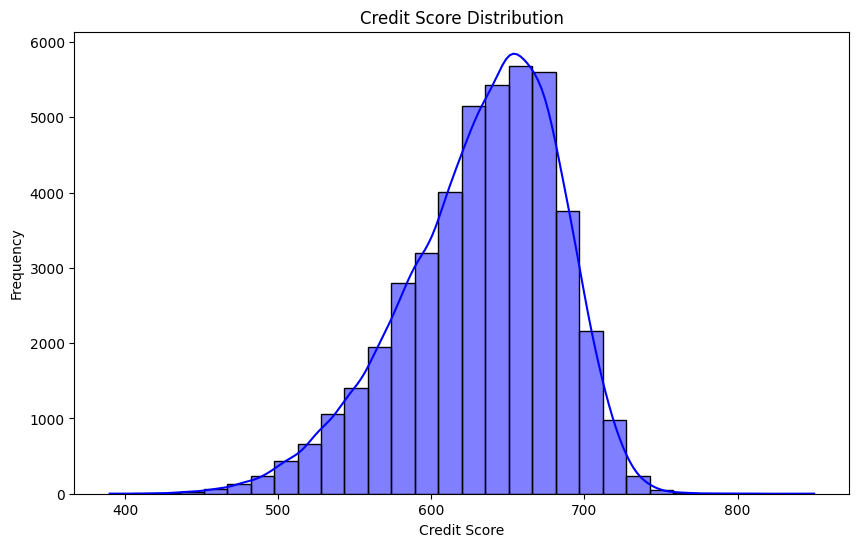

In [ ]:
# This plot visualizes the distribution of credit scores in the dataset.

plt.figure(figsize=(10, 6))
sns.histplot(df['credit_score'], kde=True, bins=30, color='blue')
plt.title('Credit Score Distribution')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()

#3.lebal encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

In [ ]:
#Apply Label Encoding to each categorical column

df['person_gender']=labelencoder.fit_transform(df['person_gender'])
df['person_education']=labelencoder.fit_transform(df['person_education'])
df['person_home_ownership']=labelencoder.fit_transform(df['person_home_ownership'])
df['loan_intent']=labelencoder.fit_transform(df['loan_intent'])
df['previous_loan_defaults_on_file']=labelencoder.fit_transform(df['previous_loan_defaults_on_file'])

In [ ]:
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,4,71948.0,0,3,35000.0,4,16.02,0.49,3.0,561,0,1
1,21.0,0,3,12282.0,0,2,1000.0,1,11.14,0.08,2.0,504,1,0
2,25.0,0,3,12438.0,3,0,5500.0,3,12.87,0.44,3.0,635,0,1
3,23.0,0,1,79753.0,0,3,35000.0,3,15.23,0.44,2.0,675,0,1
4,24.0,1,4,66135.0,1,3,35000.0,3,14.27,0.53,4.0,586,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,1,0,47971.0,6,3,15000.0,3,15.66,0.31,3.0,645,0,1
44996,37.0,0,0,65800.0,17,3,9000.0,2,14.07,0.14,11.0,621,0,1
44997,33.0,1,0,56942.0,7,3,2771.0,0,10.02,0.05,10.0,668,0,1
44998,29.0,1,1,33164.0,4,3,12000.0,1,13.23,0.36,6.0,604,0,1


#4.Data Sampling

In [ ]:
from imblearn.under_sampling import NearMiss, RandomUnderSampler
from sklearn.model_selection import train_test_split

In [ ]:
x=df.drop('loan_status',axis=1)
y=df['loan_status']

resambled=NearMiss()
x_resambled,y_resambled=resambled.fit_resample(x,y)

df1=pd.concat([x_resambled,y_resambled],axis=1)
df1

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,24.0,1,3,36909.0,0,2,10000.0,2,12.61,0.27,3.0,627,1,0
1,27.0,1,4,42795.0,3,0,5000.0,2,12.68,0.12,5.0,595,1,0
2,24.0,0,0,65925.0,0,0,5000.0,4,5.42,0.08,4.0,643,0,0
3,30.0,0,1,36946.0,7,0,12000.0,1,10.59,0.32,6.0,633,1,0
4,31.0,1,0,36906.0,7,2,10000.0,5,7.88,0.27,5.0,626,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,28.0,1,4,725801.0,9,0,25000.0,3,9.01,0.03,9.0,733,0,1
19996,29.0,1,4,726416.0,7,0,24890.0,3,9.07,0.03,9.0,634,0,1
19997,30.0,0,4,736127.0,5,0,22079.0,3,10.60,0.03,9.0,623,0,1
19998,35.0,0,0,778515.0,14,0,10000.0,4,17.19,0.01,8.0,705,0,1


<Axes: xlabel='loan_status', ylabel='count'>

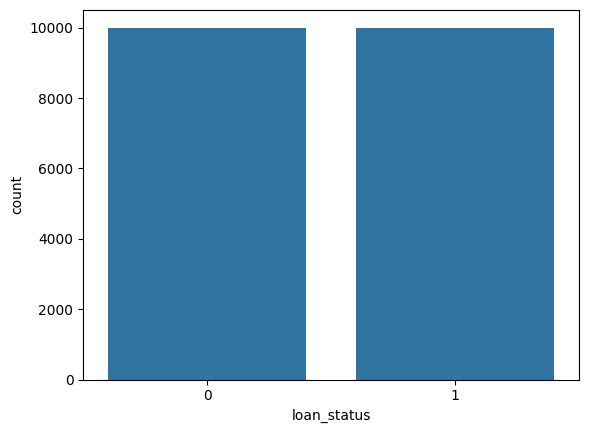

In [ ]:
sns.countplot(x='loan_status',data=df1)

#5.Feature engineering

##Correlation

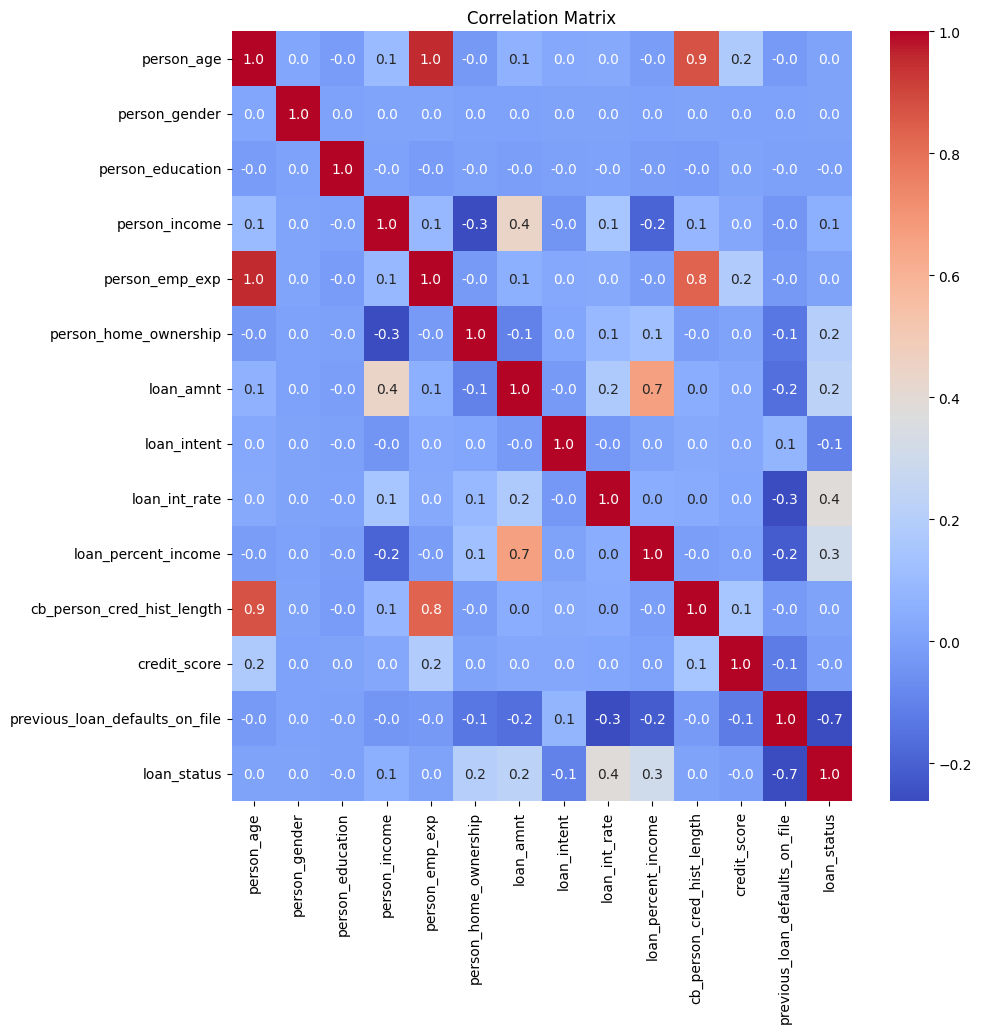

In [ ]:
corr_matrix=df1.corr()
corr_matrix
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',robust=True,fmt='0.01f',ax=ax)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
corr_matrix

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
person_age,1.000000,0.014470,-0.018868,0.099855,0.952260,-0.026647,0.060599,0.026336,0.030516,-0.015284,0.871880,0.171435,-0.025403,0.007115
person_gender,0.014470,1.000000,0.000961,0.008857,0.013332,0.000837,0.001242,0.003656,0.005433,0.000673,0.007489,0.000210,0.001332,0.004422
person_education,-0.018868,0.000961,1.000000,-0.000933,-0.016347,-0.002542,-0.008455,-0.004926,-0.000713,-0.011290,-0.017951,0.004006,-0.001462,-0.005252
person_income,0.099855,0.008857,-0.000933,1.000000,0.089855,-0.265317,0.438538,-0.044007,0.147693,-0.190804,0.082639,0.021863,-0.036750,0.050888
person_emp_exp,0.952260,0.013332,-0.016347,0.089855,1.000000,-0.024279,0.054956,0.025254,0.031215,-0.012281,0.833477,0.181194,-0.026703,0.003735
person_home_ownership,-0.026647,0.000837,-0.002542,-0.265317,-0.024279,1.000000,-0.103014,0.015196,0.097108,0.124531,-0.015272,0.004949,-0.137358,0.203311
loan_amnt,0.060599,0.001242,-0.008455,0.438538,0.054956,-0.103014,1.000000,-0.024750,0.175091,0.663432,0.047494,0.020154,-0.159653,0.227737
loan_intent,0.026336,0.003656,-0.004926,-0.044007,0.025254,0.015196,-0.024750,1.000000,-0.033243,0.007812,0.031112,0.019858,0.073723,-0.104139
loan_int_rate,0.030516,0.005433,-0.000713,0.147693,0.031215,0.097108,0.175091,-0.033243,1.000000,0.043819,0.037360,0.014244,-0.262477,0.381974
loan_percent_income,-0.015284,0.000673,-0.011290,-0.190804,-0.012281,0.124531,0.663432,0.007812,0.043819,1.000000,-0.007111,0.001856,-0.213931,0.307084


In [ ]:
sor = df.corr()['loan_status']
sor = sor.sort_values(ascending=False)
sor

,loan_status
loan_status,1.000000
loan_int_rate,0.381974
loan_percent_income,0.307084
loan_amnt,0.227737
person_home_ownership,0.203311
person_income,0.050888
cb_person_cred_hist_length,0.007424
person_age,0.007115
person_gender,0.004422
person_emp_exp,0.003735


In [ ]:
# # droping values with no and minimum correlation

df.drop(['credit_score'],axis=1,inplace=True)
df.drop(['person_education'],axis=1,inplace=True)
df.drop(['person_emp_exp'],axis=1,inplace=True)
df.drop(['person_gender'],axis=1,inplace=True)
df.drop(['person_age'],axis=1,inplace=True)
df.drop(['cb_person_cred_hist_length'],axis=1,inplace=True)
df.drop(['person_income'],axis=1,inplace=True)



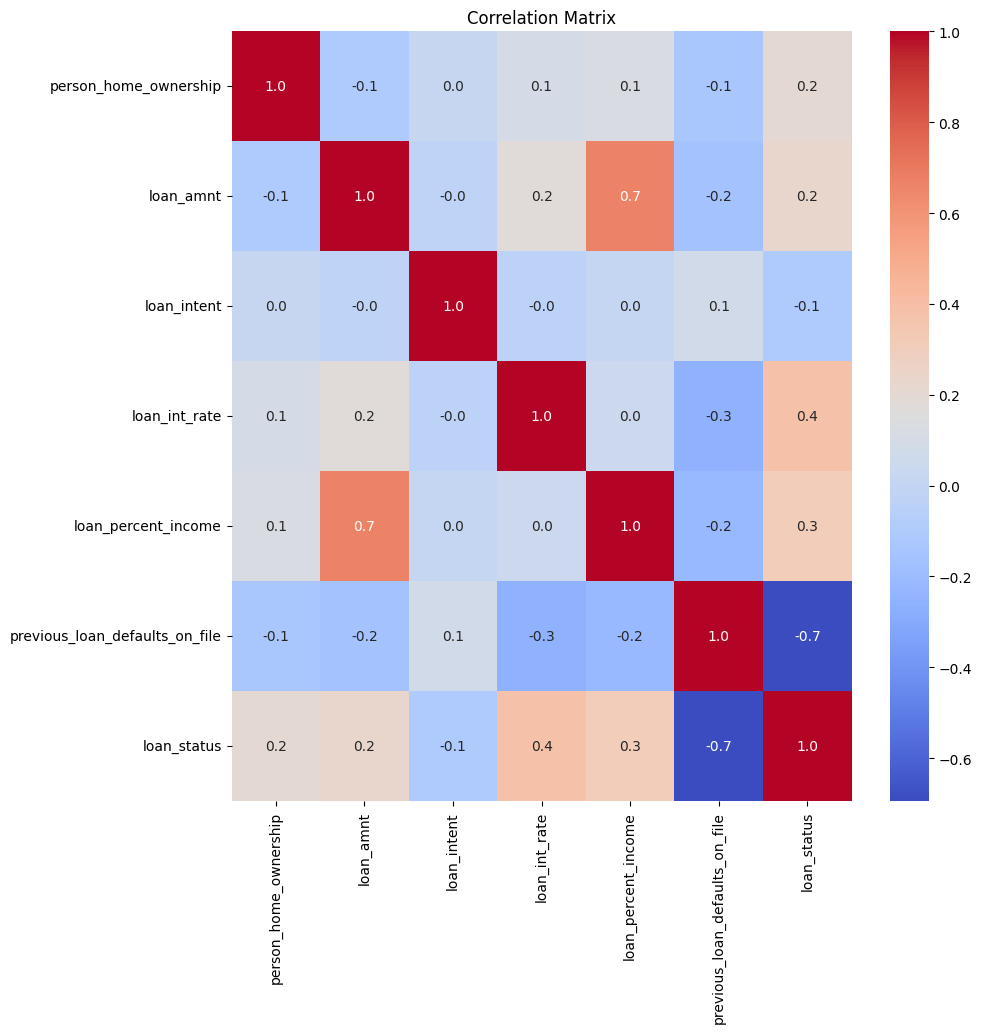

In [ ]:
corr_matrix=df.corr()
corr_matrix
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',robust=True,fmt='0.01f',ax=ax)
plt.title('Correlation Matrix')
plt.show()

##Transforming Features

In [ ]:
import numpy as np

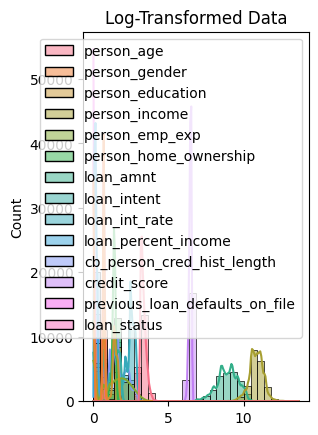

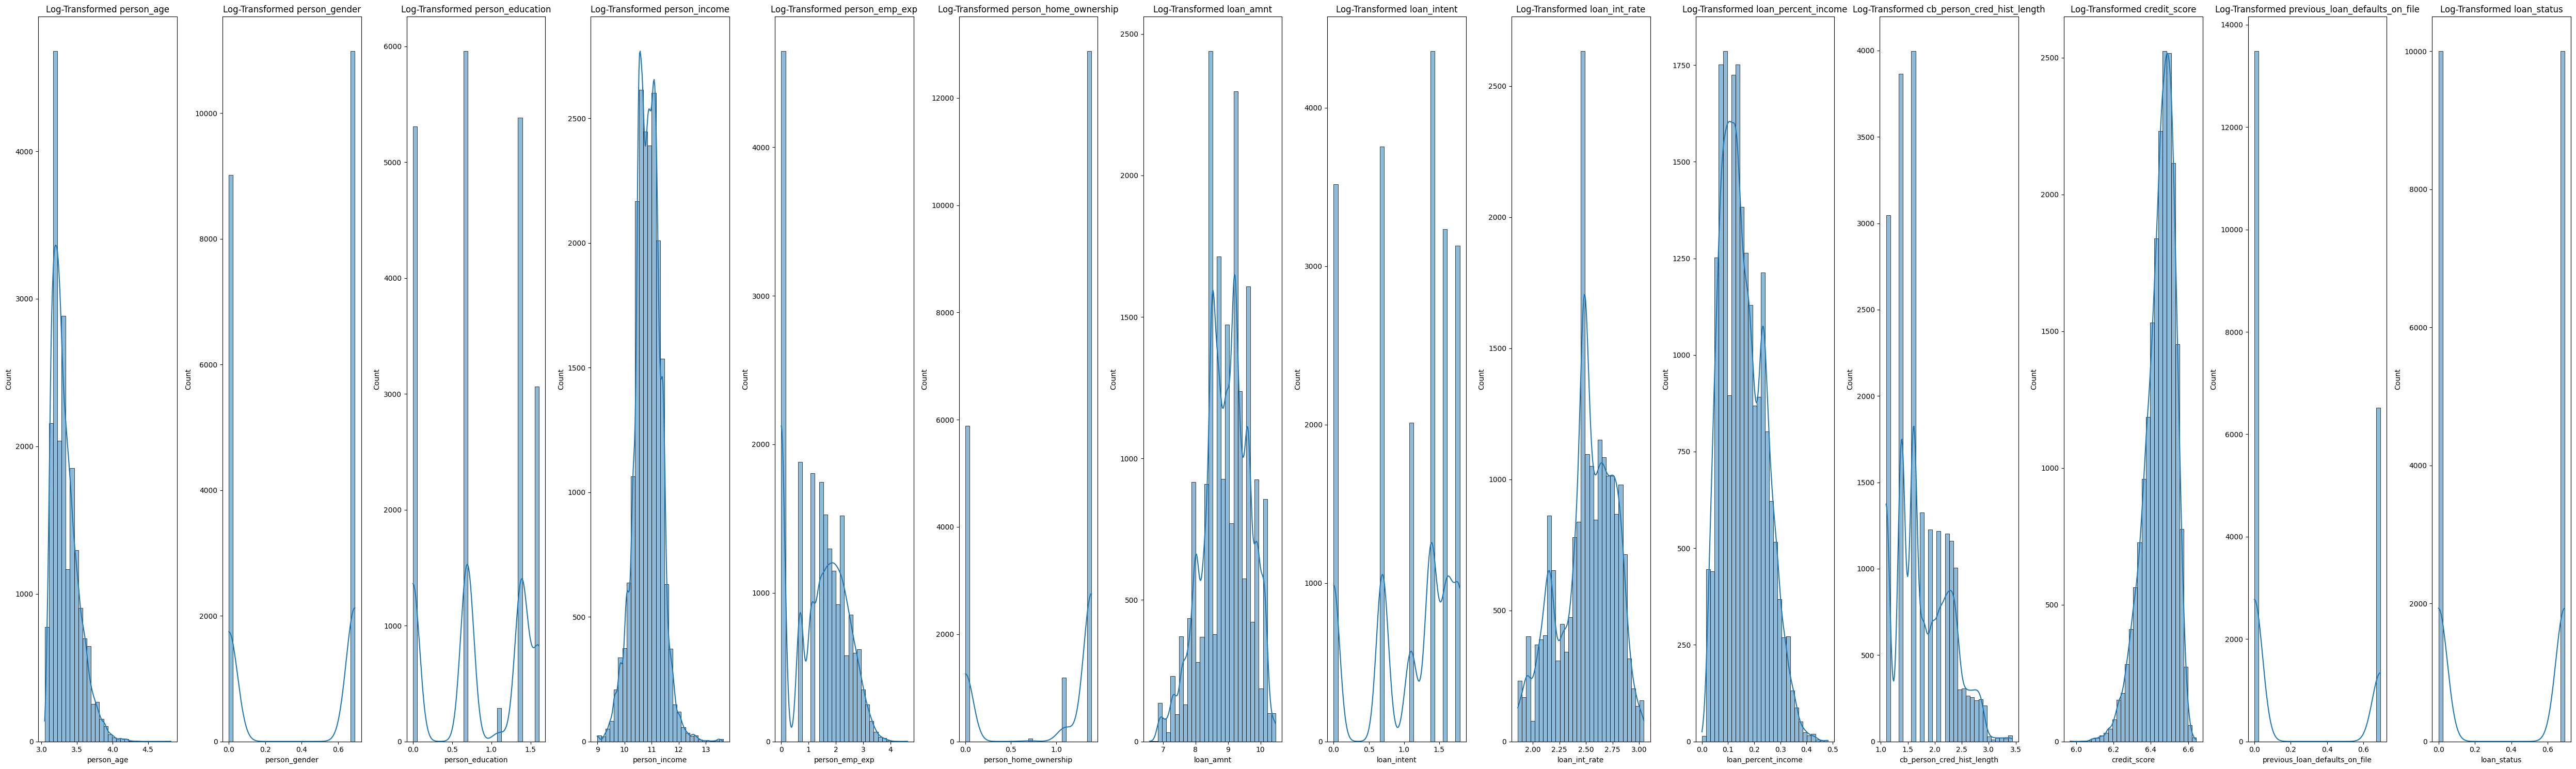

In [ ]:
# To handle skewness in the data, apply log transformation
log_data = np.log(df1 + 1)  # Adding 1 to avoid log(0) errors

# Plotting the distribution of log-transformed data for all features combined
plt.subplot(1, 2, 2)
sns.histplot(log_data, bins=30, kde=True)  # Plot histogram with kernel density estimate (KDE)
plt.title("Log-Transformed Data")  # Set title to indicate log-transformed data distribution
plt.show()

# Plotting individual distributions for each feature in the log-transformed data
# Assuming log_data is a DataFrame with multiple features
num_features = log_data.shape[1]  # Get the number of features (columns) in the data
plt.figure(figsize=(50, 15))  # Set figure size for clear visualization of multiple plots

# Iterate over each feature in the log_data DataFrame
for i, column in enumerate(log_data.columns, 1):
    plt.subplot(1, num_features, i)  # Create subplot for each feature
    sns.histplot(log_data[column], bins=30, kde=True)  # Plot histogram for each log-transformed feature
    plt.title(f"Log-Transformed {column}")  # Title for each subplot showing the feature name

plt.tight_layout()  # Adjust layout to avoid overlap between plots
plt.show()  # Display all subplots

log_data=df1


This step calculates the first (Q1), second (Q2, or median), and third quartiles (Q3) of the dataset, which divide the data into four equal parts. The interquartile range (IQR) is then computed as the difference between Q3 and Q1, representing the range of the middle 50% of the data. This helps in identifying data spread and detecting potential outliers.

In [ ]:
Q1=np.quantile(df,0.25)
Q2=np.quantile(df,0.50)
Q3=np.quantile(df,0.75)
Q1,Q2,Q3
IQR=Q3-Q1
IQR

9.57

In [ ]:
# Created a new dataframe without the target veriable removed.for removing outliers without removing the outliers of the target
hh=df1.columns.tolist()
hh.remove('loan_status')
hh

['person_age',
 'person_gender',
 'person_education',
 'person_income',
 'person_emp_exp',
 'person_home_ownership',
 'loan_amnt',
 'loan_intent',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'credit_score',
 'previous_loan_defaults_on_file']

In [ ]:
def remove_outliers_iqr(log_data, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile) for the column
    Q1 = log_data[column].quantile(0.25)
    Q3 = log_data[column].quantile(0.75)

    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for detecting outliers
    lower_bound = Q1 - 1.5  * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out the outliers from the DataFrame
    # Instead of modifying the original DataFrame, create a boolean mask
    outlier_mask = (log_data[column] >= lower_bound) & (log_data[column] <= upper_bound)

    # Return the mask instead of the filtered DataFrame
    return outlier_mask

# Create a mask for all columns
final_mask = log_data[hh[0]].notna() # Initialize with a mask of non-NA values for the first column
for i in hh:
    final_mask &= remove_outliers_iqr(log_data, i) # Combine masks using logical AND

# Apply the final mask to filter the DataFrame once
log_data_filtered = log_data[final_mask]

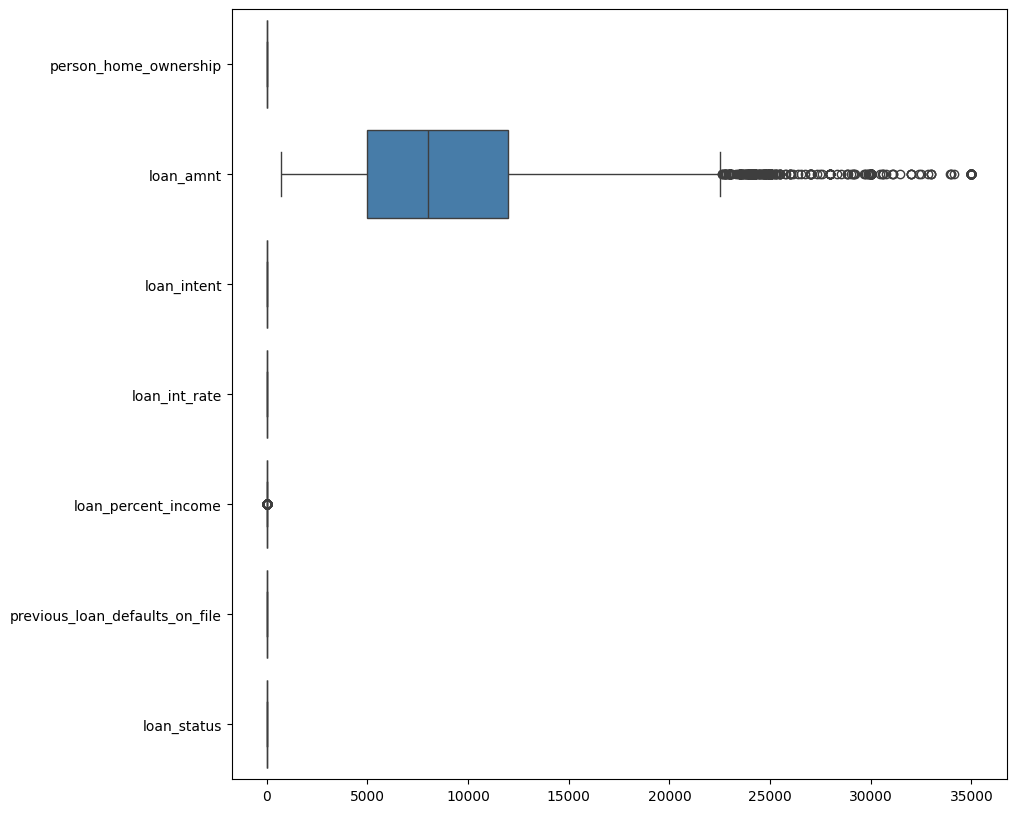

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(df,orient='h',palette='Set1')
plt.show()

In [ ]:
df.shape

(20000, 7)

#6.Training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Import the desired classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
df.columns

Index(['person_home_ownership', 'loan_amnt', 'loan_intent', 'loan_int_rate',
       'loan_percent_income', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [ ]:
independet_feature = ['person_home_ownership', 'loan_amnt', 'loan_intent', 'loan_int_rate',
       'loan_percent_income', 'previous_loan_defaults_on_file']
dependet_feature = ['loan_status']
x = df[independet_feature]
y = df[dependet_feature]

In [ ]:
# Create and fit the scaler
scaler = MinMaxScaler()
scaler.fit(x)

# Transform the data
X_scaled = scaler.transform(x)
# X_test_scaled = scaler.transform(X_test)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,#0.2 means 20% of data specified for testing set,and the other 80% for training set
                                               random_state=42)# to take the same data for training and testing set

In [ ]:
# Create a Random Forest Classifier object
model_rf = RandomForestClassifier()  # You can adjust hyperparameters
# Train the model
model_rf.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [ ]:

# Make predictions on the test set
y_pred = model_rf.predict(x_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of model1:", accuracy)

cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy of model1: 0.8985
[[1767  252]
 [ 154 1827]]


In [ ]:
df.tail(5)

,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,previous_loan_defaults_on_file,loan_status
19995,3,15000.0,3,15.66,0.31,0,1
19996,3,9000.0,2,14.07,0.14,0,1
19997,3,2771.0,0,10.02,0.05,0,1
19998,3,12000.0,1,13.23,0.36,0,1
19999,3,6665.0,0,17.05,0.13,0,1


In [ ]:
person_home_ownership=float(input('enter the person_home_ownership:'))
loan_amnt=float(input('enter the loan_amnt:'))
loan_intent=float(input('enter the loan_intent:'))
loan_int_rate=float(input('enter the loan_int_rate:'))
loan_percent_income=float(input('enter the loan_percent_income:'))
previous_loan_defaults_on_file=float(input('enter the previous_loan_defaults_on_file:'))
user_input=np.array([[person_home_ownership,loan_amnt,loan_intent,loan_int_rate	,loan_percent_income,previous_loan_defaults_on_file]])
predicted_AQI=model_rf.predict(user_input)
print('predicted price:',predicted_AQI)

enter the person_home_ownership:3
enter the loan_amnt:15000
enter the loan_intent:3
enter the loan_int_rate:15.66
enter the loan_percent_income:0.31
enter the previous_loan_defaults_on_file:0
predicted price: [1]





# **Project Summary**
---
This project focuses on analyzing loan data to understand the factors influencing loan status, including whether an applicant is likely to have their loan approved or rejected. The dataset consists of detailed information about 45,000 individuals applying for loans, with 14 features such as personal demographics (e.g., age, gender, education level, income, employment experience) and loan characteristics (e.g., loan amount, intent, interest rate, and credit score). The analysis leverages various data analysis techniques to build a predictive model for loan approval.

#1.Data Analysis & Cleaning
- We began by importing and inspecting the dataset, identifying missing values and duplicates. The next step was to address data imbalance using techniques like undersampling to ensure that our model wasn’t biased toward a particular class. Label encoding was applied to categorical variables to make them suitable for machine learning algorithms.

# 2.Data Visualization

-  To better understand the relationships in the data, several visualizations were generated:

- A countplot visualized the loan approval status.
Scatter plots helped explore the relationship between income and loan amount, with color-coding based on loan intent.
Distribution plots were created for credit scores and loan intents to assess the spread of values.

#3.Feature Engineering

- After analyzing correlations between variables, unnecessary features with minimal correlation to the target variable (loan_status) were dropped. Features like credit_score, age, and education level were found to have weak correlations with loan approval, so they were removed to reduce complexity and improve model performance. Log transformations were applied to handle skewed data, making the dataset more suitable for predictive modeling.

#4.Model Building & Evaluation

- The project utilized several classification algorithms, such as Random Forest, Logistic Regression, Decision Trees, and Gradient Boosting, to predict the likelihood of loan approval. After scaling the features, the data was split into training and testing sets (80% for training, 20% for testing). The Random Forest classifier was found to be the most accurate, with a strong prediction performance based on the test data.

- The model’s performance was evaluated using accuracy, confusion matrices, and classification reports. The results showed that the Random Forest model was able to classify loan approvals and rejections effectively, with good accuracy.

#5.User Prediction

- To make the model more interactive, a prediction feature was added, allowing users to input their loan details (such as income, loan amount, and loan intent) and receive a prediction on whether their loan is likely to be approved. The model provides a personalized response based on the user's data.

#6.Conclusion
- The project provides a comprehensive analysis of loan data and builds a robust predictive model capable of assisting financial institutions in evaluating loan applicants. The insights gained from this study can help lenders better understand the factors influencing loan approval, reduce risks, and improve decision-making processes.